##Testing

###A few reasons not to do testing


Sensibility                               | Sense
  ------------------------------------    |  -------------------------------------
  **It's boring**                         |  *Maybe*
  **Code is just a one off throwaway**    |  *As with most research codes*
  **No time for it**                      |  *A bit more code, a lot less debugging*
  **Tests can be buggy too**              |  *See above*
  **Not a professional programmer**       |  *See above*
  **Will do it later**                    | *See above*

###A few reasons to do testing

* **lazyness** *testing saves time*
* **peace of mind** *tests (should) ensure code is correct*
* **runnable specification** *best way to let others know what a function should do and
    not do*
* **reproducible debugging** *debugging that happened and is saved for later reuse*
* code structure / **modularity** *since the code is designed for at least two situations*
* easier to modify *since results can be tested*

###Not a panacea

> Trying to improve the quality of software by doing more testing is like trying to lose weight by
> weighting yourself more often.
    - Steve McConnell

 * Testing won't corrrect a buggy code
 * Testing will tell you were the bugs are...
 * ... if the test cases *cover* the bugs

##Testing primer

###Tests at different scales

Level of test               |Area covered by test
--------------------------  |----------------------
**Unit testing**            |smallest logical block of work (often < 10 lines of code)
**Component testing**       |several logical blocks of work together
**Integration testing**     |all components together / whole program


<br>
<div class="fragment fade-in">
Always start at the smallest scale! 

<div class="fragment grow">
If a unit test is too complicated, go smaller.
</div>
</div>

</div>
</div>

###Legacy code hardening

* Very difficult to create unit-tests for existing code
* Instead we make a **regression test**
* Run program as a black box:

```
setup input
run program
read output
check output against expected result
```

* Does not test correctness of code
* Checks code is a similarly wrong on day N as day 0

###Testing vocabulary

* **fixture**: input data
* **action**: function that is being tested
* **expected result**: the output that should be obtained
* **actual result**: the output that is obtained
* **coverage**: proportion of all possible paths in the code that the tests take

### Branch coverage:

```python
if energy > 0:
    ! Do this 
else:
    ! Do that
```

Is there a test for both `energy > 0` and `energy <= 0`?

##How to Test

###Equivalence partitioning

Think hard about the different cases the code will run under: this is science, not coding!

We can't write a test for every possible input: this is an infinite amount of work.

We need to write tests to rule out different bugs. There's no need to separately test *equivalent* inputs. 

Let's look at an example of this question outside of coding:

* Research Project : Evolution of agricultural fields in Saskatchewan from aerial photography
* In silico translation  : Compute overlap of two rectangles

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

Let's make a little fragment of matplotlib code to visualise a pair of fields.

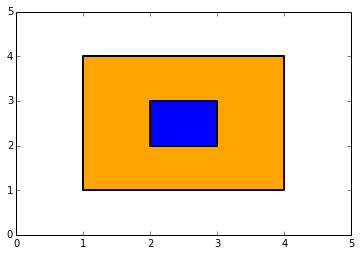

In [4]:
def show_fields(field1, field2):
    def vertices(left, bottom, right, top):
        verts = [(left, bottom),
                 (left, top),
                 (right, top),
                 (right, bottom),
                 (left, bottom)]
        return verts
    
    codes = [Path.MOVETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.CLOSEPOLY]
    path1 = Path(vertices(*field1), codes)
    path2 = Path(vertices(*field2), codes)         
    fig = plt.figure()
    ax = fig.add_subplot(111)
    patch1 = patches.PathPatch(path1, facecolor='orange', lw=2)
    patch2 = patches.PathPatch(path2, facecolor='blue', lw=2)         
    ax.add_patch(patch1)
    ax.add_patch(patch2)       
    ax.set_xlim(0,5)
    ax.set_ylim(0,5)

show_fields((1.,1.,4.,4.),(2.,2.,3.,3.))

Here, we can see that the area of overlap, is the same as the smaller field, with area 1.

We could now go ahead and write a subroutine to calculate that, and also write some test cases for our answer.

But first, let's just consider that question abstractly, what other cases, *not equivalent to this* might there be?

For example, this case, is still just a full overlap, and is sufficiently equivalent that it's not worth another test:

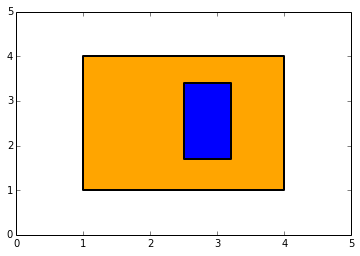

In [7]:
show_fields((1.,1.,4.,4.),(2.5,1.7,3.2,3.4))

But this case is no longer a full overlap, and should be tested separately:

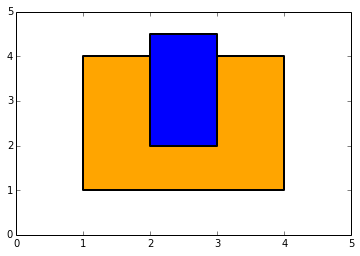

In [20]:
show_fields((1.,1.,4.,4.),(2.,2.,3.,4.5))

On a piece of paper, sketch now the other cases you think should be treated as non-equivalent. The answers are in a separate
notebook.

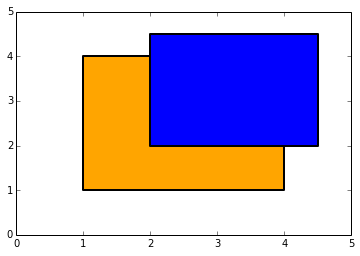

In [21]:
show_fields((1.,1.,4.,4.),(2,2,4.5,4.5)) # Overlap corner

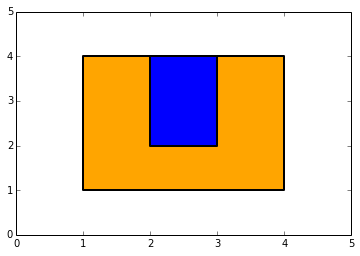

In [23]:
show_fields((1.,1.,4.,4.),(2.,2.,3.,4.)) # Just touching

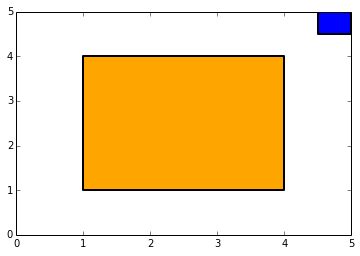

In [27]:
show_fields((1.,1.,4.,4.),(4.5,4.5,5,5)) # No overlap

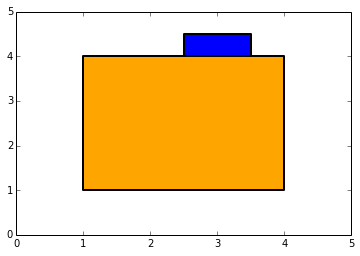

In [10]:
show_fields((1.,1.,4.,4.),(2.5,4,3.5,4.5)) # Just touching from outside

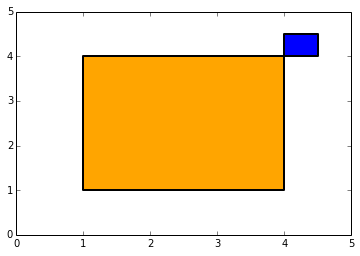

In [14]:
show_fields((1.,1.,4.,4.),(4,4,4.5,4.5)) # Touching corner

## Using our tests

OK, so how might our tests be useful?

Here's some code that **might** correctly calculate the area of overlap:

In [28]:
def overlap(field1, field2):
    left1, bottom1, top1, right1 = field1
    left2, bottom2, top2, right2 = field2
    overlap_left=max(left1, left2)
    overlap_bottom=max(bottom1, bottom2)
    overlap_right=min(right1, right2)
    overlap_top=min(top1, top2)
    overlap_height=(overlap_top-overlap_bottom)
    overlap_width=(overlap_right-overlap_left)
    return overlap_height*overlap_width

So how do we check our code?

The manual approach would be to look at some cases, and, once, run it and check:

In [29]:
overlap((1.,1.,4.,4.),(2.,2.,3.,3.))

1.0

That looks OK.

But we can do better, we can write code which **raises an error** if it gets an unexpected answer:

In [30]:
assert overlap((1.,1.,4.,4.),(2.,2.,3.,3.)) == 1.0

In [31]:
assert overlap((1.,1.,4.,4.),(2.,2.,3.,4.5)) == 2.0 

In [32]:
assert overlap((1.,1.,4.,4.),(2.,2.,4.5,4.5)) == 4.0 

In [33]:
assert overlap((1.,1.,4.,4.),(4.5,4.5,5,5)) == 0.0 

AssertionError: 

In [34]:
print overlap((1.,1.,4.,4.),(4.5,4.5,5,5))

0.25


What? Why is this wrong?

In our calculation, we are actually getting:

In [36]:
overlap_left=4.5
overlap_right=4
overlap_width=-0.5
overlap_height=-0.5

Both width and height are negative, resulting in a positive area.
The above code didn't take into account the non-overlap correctly.

It should be:
    

In [43]:
def overlap(field1, field2):
    left1, bottom1, top1, right1 = field1
    left2, bottom2, top2, right2 = field2
    
    overlap_left=max(left1, left2)
    overlap_bottom=max(bottom1, bottom2)
    overlap_right=min(right1, right2)
    overlap_top=min(top1, top2)
    
    overlap_height=max(0, (overlap_top-overlap_bottom))
    overlap_width=max(0, (overlap_right-overlap_left))
    
    return overlap_height*overlap_width

In [45]:
assert overlap((1,1,4,4),(2,2,3,3)) == 1.0
assert overlap((1,1,4,4),(2,2,3,4.5)) == 2.0 
assert overlap((1,1,4,4),(2,2,4.5,4.5)) == 4.0 
assert overlap((1,1,4,4),(4.5,4.5,5,5)) == 0.0 
assert overlap((1,1,4,4),(2.5,4,3.5,4.5)) == 0.0 
assert overlap((1,1,4,4),(4,4,4.5,4.5)) == 0.0 

Note, we reran our other tests, to check our fix didn't break something else. (We call that "fallout")

###Boundary cases

"Boundary cases" are an important area to test:

* Limit between two equivalence classes: edge and corner sharing fields
* Wherever indices appear, check values at ``0``, ``N``, ``N+1``
* Empty arrays:

``` python
    atoms = [read_input_atom(input_atom) for input_atom in input_file]
    energy = force_field(atoms)
```

* What happens if ``atoms`` is an empty list?
* What happens when a matrix/data-frame reaches one row, or one column?

##Positive *and* negative tests

* **Positive tests**: code should give correct answer with various inputs
* **Negative tests**: code should crash as expected given invalid inputs, rather than lying

<div align="left">
Bad input should be expected and should fail early and explicitly.

<div class="fragment roll-in">
Testing should ensure that explicit failures do indeed happen.

## Raising exceptions

In Python, we can signal an error state by raising an error:

In [48]:
def I_only_accept_positive_numbers(number):
    # Check input
    if number < 0: 
        raise ValueError("Input "+ str(number)+" is negative")

    # Do something

In [49]:
I_only_accept_positive_numbers(5)

In [50]:
I_only_accept_positive_numbers(-5)

ValueError: Input -5 is negative

There are standard "Exception" types, like `ValueError` we can `raise`

We would like to be able to write tests like this:

In [52]:
assert I_only_accept_positive_numbers(-5) == # Gives a value error

SyntaxError: invalid syntax (<ipython-input-52-af84655f8e47>, line 1)

But to do that, we need to learn about more sophisticated testing tools, called "test frameworks".

##Testing frameworks

###Why use testing frameworks?

Frameworks should simplify our lives:

* Should be easy to add simple test
* Should be possible to create complex test:
    * Fixtures
    * Setup/Tear down
    * Parameterized tests (same test, mostly same input)
* Find all our tests in a complicated code-base 
* Run all our tests with a quick command
* Run only some tests, e.g. ``test --only "tests about fields``
* **Report failing tests**
* Additional goodies, such as code coverage

###Common testing frameworks

* Language agnostic: [CTest](http://www.cmake.org/cmake/help/v2.8.12/ctest.html)
  * Test runner for executables, bash scripts, etc...
  * Great for legacy code hardening
    
* C unit-tests:
    * all c++ frameworks,
    * [Check](http://check.sourceforge.net/),
    * [CUnit](http://cunit.sourceforge.net)

* C++ unit-tests:
    * [CppTest](http://cpptest.sourceforge.net/),
    * [Boost::Test](http://www.boost.org/doc/libs/1_55_0/libs/test/doc/html/index.html),
    * [google-test](https://code.google.com/p/googletest/),
    * [Catch](https://github.com/philsquared/Catch) (best)

* Python unit-tests:
    * [nose](https://nose.readthedocs.org/en/latest/) includes test discovery, coverage, etc
    * [unittest](http://docs.python.org/2/library/unittest.html) comes with standard python library
    * [py.test](http://pytest.org/latest/), branched off of nose

* R unit-tests:
    * [RUnit](http://cran.r-project.org/web/packages/RUnit/index.html),
    * [svUnit](http://cran.r-project.org/web/packages/svUnit/index.html)
    * (works with [SciViews](http://www.sciviews.org/) GUI)

* Fortran unit-tests:
    * [funit](http://nasarb.rubyforge.org/funit/),
    * [pfunit](http://sourceforge.net/projects/pfunit/)(works with MPI)

###Nose framework: usage

[nose](https://nose.readthedocs.org/en/latest/) is a python testing framework.

We can use its tools in the notebook for on-the-fly tests:

In [55]:
from nose.tools import assert_raises

In [57]:
with assert_raises(ValueError):
    assert I_only_accept_positive_numbers(-5)

but the real power comes when we write a test file alongside our code files in our homemade packages:

In [59]:
%%bash
mkdir -p saskatchewan
touch saskatchewan/__init__.py

In [64]:
%%writefile saskatchewan/overlap.py
def overlap(field1, field2):
    left1, bottom1, top1, right1 = field1
    left2, bottom2, top2, right2 = field2
    
    overlap_left=max(left1, left2)
    overlap_bottom=max(bottom1, bottom2)
    overlap_right=min(right1, right2)
    overlap_top=min(top1, top2)
    # Here's our wrong code again
    overlap_height=(overlap_top-overlap_bottom)
    overlap_width=(overlap_right-overlap_left)
    
    return overlap_height*overlap_width

Overwriting saskatchewan/overlap.py


In [66]:
%%writefile saskatchewan/test_overlap.py
from overlap import overlap
from nose.tools import assert_equal

def test_full_overlap():
    assert_equal(overlap((1.,1.,4.,4.),(2.,2.,3.,3.)), 1.0)

def test_partial_overlap():
    assert_equal(overlap((1,1,4,4),(2,2,3,4.5)), 2.0)
                 
def test_no_overlap():
    assert_equal(overlap((1,1,4,4),(4.5,4.5,5,5)), 0.0)

Overwriting saskatchewan/test_overlap.py


In [67]:
%%bash
cd saskatchewan
nosetests

..F
FAIL: saskatchewan.test_overlap.test_no_overlap
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/usr/local/lib/python2.7/site-packages/nose/case.py", line 197, in runTest
    self.test(*self.arg)
  File "/Users/jamespjh/devel/rsdt/training/rsd-engineeringcourse/session03/saskatchewan/test_overlap.py", line 11, in test_no_overlap
    assert_equal(overlap((1,1,4,4),(4.5,4.5,5,5)), 0.0)
AssertionError: 0.25 != 0.0

----------------------------------------------------------------------
Ran 3 tests in 0.001s

FAILED (failures=1)


Note that it reported **which** test had failed, how many tests ran, and how many failed.

The symbol `..F` means there were three tests, of which the third one failed.

Nose will:

* automagically finds files ``test_*.py``
* collects all subroutines called ``test_*``
* runs tests and reports results

Some options:

* help: `nosetests --help`
* test only a given file: `nosetests test_file.py`
* compute coverage: `nosetests --with-coverage`

##Testing with floating points

###Floating points are not reals


Floating points are inaccurate representations of real numbers:

`1.0 == 0.99999999999999999` is true to the last bit.

This can lead to numerical errors during calculations: $1000 (a - b) \neq 1000a - 1000b$

In [69]:
>>> 1000.0 * 1.0 - 1000.0 * 0.9999999999999998
2.2737367544323206e-13

>>> 1000.0 * (1.0 - 0.9999999999999998)
2.220446049250313e-13

2.220446049250313e-13

*Both* results are wrong: `2e-13` is the correct answer.

The size of the error will depend on the magnitude of the floating points:

In [71]:
>>> 1000.0 * 1e5 - 1000.0 * 0.9999999999999998e5
1.4901161193847656e-08

1.4901161193847656e-08

The result should be `2e-8`.

###Comparing floating points

Comparison can be absolute:

In [74]:
from nose.tools import assert_almost_equal
assert_almost_equal( 0.7, 0.7 + 1e-6, delta = 1e-5)

<div class="fragment roll-in">
Or relative:

In [75]:
from nose.tools import assert_almost_equal
magnitude = 0.7
assert_almost_equal(0.7, 0.7 + 1e-5, delta = magnitude * 1e-5)

AssertionError: 0.7 != 0.7000099999999999 within 7e-06 delta

Where `magnitude` should be chosen based on the intrinsic scale of the calculations.

For instance, if calculations is a result of differences between large numbers:

In [77]:
(1e15 + 1.4) - (1e15 + 0.7)


0.625

then `magnitude = 1e15` is reasonable. 

However, the best choice of scale for comparison in scientific floating point testing is an active area of research.

###Comparing vectors of floating points

Numerical vectors are best represented using [numpy](http://www.numpy.org/).

In [78]:
from numpy import array, pi

vector_of_reals = array([0.1, 0.2, 0.3, 0.4]) * pi

Numpy ships with a number of assertions (in ``numpy.testing``) to make
comparison easy:

In [80]:
from numpy import array, pi
from numpy.testing import assert_allclose
expected = array([0.1, 0.2, 0.3, 0.4, 1e-12]) * pi
actual = array([0.1, 0.2, 0.3, 0.4, 2e-12]) * pi
actual[:-1] += 1e-6

assert_allclose(actual, expected, rtol=1e-5, atol=1e-8)

It compares the difference between `actual` and `expected` to ``atol + rtol * abs(expected)``.

##Classroom exercise: energy calculation

###Diffusion model in 1D

Description: simplistic 1-dimensional diffusion model

- Particles are on a 1d axis
- Particles do not want to be where there are other particles

Implementation:

- Given a vector $n$ of positive integers, and of arbitrary length
- Compute the energy, $E(n) = \frac{D}{2} \sum_i n_i(n_i - 1),$ where $D$ is a scalar coefficient.

{% raw %}
<svg id="model" width="500" height="150" class="boundary"></svg>
<script src="http://d3js.org/d3.v3.min.js" charset="utf-8"></script>
<script src="http://lab.hakim.se/reveal-js//lib/js/head.min.js" ></script>
<script src="http://lab.hakim.se/reveal-js//js/reveal.min.js" ></script>
<style>
.axis path, .axis line {
  fill: none;
  stroke: white;
  shape-rendering: crispEdges;
}
.axis text {
  fill: white
}
</style>
<script>
  function externalDimensions(id) {
    var svgElement = document.getElementById("model");
    var externalWidth = parseInt(svgElement.getAttribute("width"));
    var externalHeight = parseInt(svgElement.getAttribute("height"));
    return {width: externalWidth, height:externalHeight}
  }
  function model() {
    var margin = {top: 20, right: 10, bottom: 35, left: 10};
    var width=100, height=100
    var externalDims = externalDimensions("model");
    externalDims.height -= margin.top + margin.bottom
    externalDims.width -= margin.left + margin.right
    var svg = d3.select("#model").append("g")
                .attr("transform", "translate(" + margin.left + ", " + margin.top + ")");
    var numbers = Array.apply(null, Array(10)).map(function (_, i) {return i;});

In [ ]:
var yscale = d3.scale.linear().domain([0, height]).range([0, externalDims.height]);
var xscale = d3.scale.ordinal().domain(numbers).rangePoints([0, externalDims.width])
var xAxis = d3.svg.axis().orient("bottom").scale(xscale);

// svg.append("rect").attr("x", -margin.left).attr("y", -margin.top)
//         .attr("height", externalDims.height + margin.bottom + margin.top)
//         .attr("width", externalDims.width + margin.right + margin.right)
//         .style("fill", "rgb(100, 100, 100)")

var margingroup = svg.append("g") .attr("transform", "translate(0, " + externalDims.height + ")");
var axisgroup = margingroup.append("g").attr("class", "x axis").call(xAxis);

var nbrects = [0, 0, 3, 5, 8, 4, 2, 1]
var rectangles = []
for(var j = 0; j < nbrects.length; ++j) {
  for(var i = 0; i < nbrects[j]; ++i) rectangles.push([j, i])
}

function xPos(i) { return xscale(i) - 10; }
function yPos(i) { return -yscale(i * 14 + 15); }
var rectgroup = margingroup.append("g")
rectgroup.selectAll("rect").data(rectangles, function(d, i) {return i;}).enter()
        .append("rect")
        .attr("x", function(d) { return xPos(d[0]); })
        .attr("y", function(d) { return yPos(d[1]); })
        .attr("id", function(d, i) { return "rect" + i; })
        .attr("width", 20).attr("height", yscale(12)).style("fill", "blue").style("stroke-width", "1px");
return {x: xPos, y: yPos, group: rectgroup}
  }
  particle_position = model();
  particle_movements = [
[7, 2, 1],
[14, 5, 3],
[1, 1, 0],
[19, 6, 3],
[7, 3, 4],
[2, 0, 0],
[7, 2, 2],
[15, 6, 2],
[15, 5, 4],
[2, 1, 0]
  ];
  function update_particles() {
 if(particle_movements.length == 0) { clearInterval(); return; }
 newPosition = particle_movements.pop();
 particle_position.group.select("#rect" + newPosition[0])
   .transition()
   .duration(750)
   .attr("x", particle_position.x(newPosition[1]))
   .attr("y", particle_position.y(newPosition[2]));
  }
  Reveal.addEventListener( 'slidechanged', function( event ) {
  if(event.currentSlide.getAttribute("id") != "diffusion") {
    clearInterval();
  } else { setInterval(update_particles, 1500); }
  // event.previousSlide, event.currentSlide, event.indexh, event.indexv
  } );
</script>
{% endraw %}

###Starting point

In a directory, create two files:

* Implementation file: diffusion_model.py

In [ ]:
def energy(density, coeff=1.0):
  """ Energy associated with the diffusion model

      Parameters
      ----------

      density: array of positive integers
          Number of particles at each position i in the array
      coeff: float
          Diffusion coefficient.
  """
  # implementation goes here

* Testing file: test_diffusion_model.py

In [ ]:
from diffusion_model import energy
def test_energy():
  """ Optional description for nose reporting """
  # Test something

###Solution

Don't look until after class! We have implemented sample solutions of the [functions](https://github.com/UCL/rsd-engineeringcourse/blob/staging/session03/solutions/diffusionmodel/diffusion_model.py) and [tests](https://github.com/UCL/rsd-engineeringcourse/blob/staging/session03/solutions/diffusionmodel/test_diffusion_model.py) for you to review.


###Coverage

1. Comment out from exception tests in solution
1. in solution directory, run
    ``` bash
    nosetests --with-coverage --cover-package=diffusion_model -v --cover-html
    ```
1. Open ``cover/index.html`` for coverage information


![](session03/figures/coverage.png)
---
title: Mocking
---

##Mocking

###Definition

**Mock**: *verb*,

1. to tease or laugh at in a scornful or contemptuous manner
2. to make a replica or imitation of something



**Mocking**

- *computer science*, to simulate the behaviour of real objects in controlled ways.
</div>

**Stub routine**

- A routine that a simulate a more computationally expensive routine, without actually performing any calculation. Strictly speaking, the term Mocking is reserved for object-oriented approaches
</div>

###Mocking frameworks

* C: [CMocka](http://www.cmocka.org/)
* C++: [googlemock](https://code.google.com/p/googlemock/)
* Python: [Mock](http://www.voidspace.org.uk/python/mock/)
  ([unittest.mock](http://docs.python.org/dev/library/unittest.mock) in python 3.3),
  [doublex](https://pypi.python.org/pypi/doublex)

###Recording calls with mock

Mock objects record the calls made to them:

In [ ]:
>>> from mock import Mock
>>> function = Mock(name="myroutine", return_value=2)
>>> function(1)
2
>>> function(5, "hello", a=True)
2
>>> function.mock_calls
[call(1), call(5, 'hello', a=True)]

The arguments of each call can be recovered

In [ ]:
>>> name, args, kwargs = function.mock_calls[1]
>>> args, kwargs
((1, 'hello'), {'a': True})

Mock objects can return different values for each call

In [ ]:
>>> function = Mock(name="myroutine", side_effect=[2, "xyz"])
>>> function(1), function(1, "hello", {'a': True})
(2, "xyz")
>>> function() # No more values to return --> mock throws an exception
StopIteration error thrown in ....

###Testing functions that call other functions

<div align="left">

In [ ]:
def minimize(model, start_input):
    start_value = model(start_input)
    # ... more calls to model
    return result

**Black-box**

`model` is a function for which we think we know the result: e.g. small analytical model, rather than big expensive calculation. 

Internals of `minimize` are irrelevant. Only the result matters.

**Clear-box**

`model` is a mock object. Sequence of calls to `model` is checked and is part of the test.

<div class="fragment fade-in">
`minimize` must be tested in *isolation* from the rest of the code!
</div>

</div>

###Exercise: derivative function

**Goal**

Compute the derivative of the diffusion model 
from [the previous exercise](#/diffusion).

**Description**

Create a function that takes a function, an integer density, and an index $i$, and returns the right-derivative   $f(n_i + 1) - f(n_i)$

In [ ]:
def partial_derivative(function, x, index):
    """ Computes right derivative of function over integers

    :param function: callable object for which to compute the derivative
    :param x: array of integers at which to compute the right-derivative
    :param index: Partial derivative direction.
    """
    from numpy import array

    x_right = array(x).copy()
    x_right[index] += 1
    return function(x) - function(x_right)

---
title: Debugging
---

##Using a debugger

###Stepping through the code

Debuggers are programs that can be used to test other programs. They allow programmers to suspend execution of the target program and inspect variables at that point.

* Mac - compiled languages:
  [Xcode](https://developer.apple.com/library/ios/documentation/ToolsLanguages/Conceptual/Xcode_Overview/DebugYourApp/DebugYourApp.html)
* Windows - compiled languages:
  [Visual Studio](http://msdn.microsoft.com/en-us/library/bb483011.aspx)
* Linux: [DDD](https://www.gnu.org/software/ddd/)
* all platforms: [eclipse](http://www.eclipse.org), [gdb](http://www.sourceware.org/gdb/) (DDD and
  eclipse are GUIs for gdb)
* python: [spyder](http://pythonhosted.org/spyder/index.html),
          [pdb](http://docs.python.org/2/library/pdb.html)
* R: [RStudio](http://www.rstudio.com/ide/docs/debugging/overview),
  [debug](http://stat.ethz.ch/R-manual/R-devel/library/base/html/debug.html),
  [browser](http://stat.ethz.ch/R-manual/R-devel/library/base/html/browser.html)

###Using the python debugger

Copy the following into a file:

In [ ]:
def energy(x):
    from numpy import array, sum
    x = array(x)
    return sum(x * (x - 1))

def partial_derivative(function, x, index):
    """ Computes right derivative of function over integers

    :Parameters:
        function: callable object
            The function for which to compute the delta/derivative
        x: array of integers
            The point at which to compute the right-derivative
        index: integer
            Partial derivative direction.
    """
    from numpy import array
    # Computes left value
    left_value = function(x)

    # Copies and modifies x. Could do it without copy, but that complicates mocking.
    x = array(x)
    x[index] += 1
    right_value = function(x)

    return right_value - left_value

if __name__ == "__main__":
    partial_derivative(energy, [5, 6, 7, 8, 0, 1], 5)

###Basic navigation:

Basic command to navigate the code and the python debugger:

* `help`: prints the help
* `help n`: prints help about command `n`
* `n`(ext): executes one line of code. Executes and steps **over** functions.
* `s`(tep): step into current function in line of code
* `l`(ist): list program around current position
* `w`(where): prints current stack (where we are in code)
* `[enter]`: repeats last command

The python debugger is a python shell: it can print and compute values, and even change the values
of the variables at that point in the program.

###Breakpoints

Break points tell debugger where and when to stop

In [ ]:
>>> restart  # restart session
>>> b energy # program will stop when entering energy
>>> c        # continue program until break point is reached

Alternatively, break-points can be set on files: `b file.py:20` will stop on line 20 of `file.py`.

<div class="fragment roll-in">
Break-points can run subject  to a given condition evaluating to true

In [ ]:
>>> cl # clear all breakpoints
>>> b energy, x[5] == 2
>>> restart
>>> c

</div>

###Post-mortem

Debugging when something goes wrong:

1. add `raise Exception("OMG!")` somewhere in the code
1. run `python -m pdb file.py`
1. hit `c`

The program should stop where the exception was raised

1. use `w` and `l` for position in code and in call stack
1. use `up` and `down` to navigate up and down the call stack
1. inspect variables along the way to understand failure

---
title: Methodology
---

##Test driven development

###Test-driven development

![Developing with TDD: Write test, see it fail](session03/figures/tdd)

###Behaviour driven development

- Plain English description of scenario
- Communicates behavior of code, rather than how code works
- Simple enough for thesis director to understand
- Translated to code internally by developer

In [ ]:
Scenario: eat 5 out of 12
  Given there are 12 cucumbers
  When I eat 5 cucumbers
  Then I should have 7 cucumbers

---
title: Other Tools
---

##Jenkins

###Test servers

Goal: 

1. run tests nightly
2. run tests after each commit to github (or other)
3. run tests on different platforms

![Now at a UCL near you!](session03/figures/jenkins)


###Memory and profiling

* Checking for memory leaks with [valgrind](http://valgrind.org/):
  `valgrind --leak-check=full program`
* Checking cache hits and cache misses with
  [cachegrind](http://valgrind.org/docs/manual/cg-manual.html):
  `valgrind --tool=cachegrind program`
* Profiling the code with [callgrind](http://valgrind.org/docs/manual/cl-manual.html):
  `valgrind --tool=callgrind program`

In [ ]:
![](session03/figures/callgrind)

* Python: [profile](http://docs.python.org/2/library/profile.html)
* R: [Rprof](http://stat.ethz.ch/R-manual/R-devel/library/utils/html/Rprof.html)

---
title: "Exercise: Monte-Carlo"
---

##Exercise: Monte-Carlo

###Description: Implement and test a simple Monte-Carlo algorithm

<div align="left" style="position:relative;left:15px">
Given an input function (energy) and starting point (density) and a temperature $T$: 

1. Compute energy at current density.
1. Move randomly chosen particle left or right.
1. Compute second energy.
1. Compare the two energies:

In [ ]:
1. If second energy is lower, accept move.
1. Otherwise compute $P_0=e^{-\frac{E_1 - E_0}{T}}$ and $P_1$ a random number,
   accept move only if $P_0 > P_1$.

1. Repeat.
</div>

###Caveats

* the algorithm should work for (m)any energy function(s).
* there should be separate tests for separate steps! What constitute a step?
* test should not depend on other parts of code.

###Bonus

* Use a debugger to stop code at each iteration.
* Use [matplotlib](http://matplotlib.org/) to plot density at each iteration.

###Assessment

- You are not required to submit a full solution to pass.
- This is a pass/fail exercise.
- To pass, we are looking for:
    + several relevant functions, in appropriate python modules.
    + appropriate, sensibly structured unit tests.
    + version control history showing tests being developed alongside code.

Submit your code by emailing rc-softdev@ucl.ac.uk with a link to a repository on your GitHub account containing your solution.
